# Ejercicio en clase

Emplear el programa del “juego de la vida” de John Conway para realizar el siguiente proceso de simulación:
* Determinar las variables que rigen el sistema
* Diseñar un plan de simulación que permita llegar a una configuración en que los autómatas celulares no varíen
* Diseñar un plan de pruebas automatizado, es decir, que sea controlado por el ordenador y que permita lanzar una batería de experimentos.
* Recopilar los resultados de estos planes.
* Dirección Web del Juego de la Vida:
http://www.bitstorm.org/gameoflife/


In [8]:
from time import sleep

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation

import random
from matplotlib.widgets import Button



Pues bien, vamos a desplazar nuestro tablero una posición en las ocho direcciones posibles (recuerda que se cuenta la diagonal también) y vamos a sumar el resultado. Como cada célula viva tendrá el valor 1, esto me dará, en cada celda, el número de células vecinas vivas.

In [9]:
def vecindario(b):
    """Array de células vivas en el vecindario."""
    vecindario = (
        np.roll(np.roll(b, 1, 1), 1, 0) +  # Abajo-derecha
        np.roll(b, 1, 0) +  # Abajo
        np.roll(np.roll(b, -1, 1), 1, 0) +  # Abajo-izquierda
        np.roll(b, -1, 1) +  # Izquierda
        np.roll(np.roll(b, -1, 1), -1, 0) +  # Arriba-izquierda
        np.roll(b, -1, 0) +  # Arriba
        np.roll(np.roll(b, 1, 1), -1, 0) +  # Arriba-derecha
        np.roll(b, 1, 1)  # Derecha
    )
    return vecindario

Una vez que tenemos el array vecindario, es sencillísimo determinar qué células sobreviven, cuáles mueren y cuáles nacen:

In [10]:
def paso(b):
    """Paso en el juego de la vida de Conway."""
    v = vecindario(b)
    buffer_b = b.copy()  # Hacemos una copia de la matriz
    for i in range(buffer_b.shape[0]):
        for j in range(buffer_b.shape[1]):
            if v[i, j] == 3 or (v[i, j] == 2 and buffer_b[i, j]):
                buffer_b[i, j] = 1
            else:
                buffer_b[i, j] = 0
    return buffer_b

In [11]:
# Parámetros del problema
GENERACIONES = 100
N = 16 # Dimensiones del tablero (N, M)
M = N

pause = True # Pausa

def onClick(event):
    global pause
    pause ^= True

# Construimos el tablero
tablero = np.zeros((N, M), dtype = int)

# CONDICIONES INICIALES (CASILLAS ENCENDIDAS)
#   Añadimos una nave 
tablero[1, 1:4] = 1
tablero[2, 1] = 1
tablero[3, 2] = 1

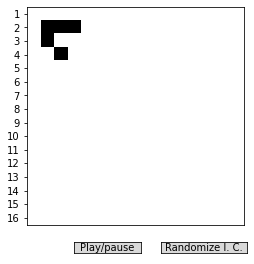

In [12]:
def randomize(event):
    for i in range(0, N-1):
        for j in range(0, N-1):
            tablero[i, j] = random.randint(0, 1)
    global b
    b = tablero
    imagen.set_data(b)
    print(tablero)

# Creamos la figura, formateo diverso
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
# ax.axis('off')
b = tablero 
imagen = ax.imshow(b, interpolation="none", aspect = "equal", cmap=cm.gray_r)

# Major ticks
# ax.set_xticks(np.arange(0, N, 1));
ax.set_yticks(np.arange(0, N, 1));

# Labels for major ticks
# ax.set_xticklabels(np.arange(1, N+1, 1));
ax.set_yticklabels(np.arange(1, N+1, 1));

# Minor ticks
# ax.set_xticks(np.arange(-.5, N, 1), minor=True);
# ax.set_yticks(np.arange(-.5, N, 1), minor=True);

plt.tick_params(    
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

def animate(i):
    global b

    if not pause: # Pause check
        print(i) # El parámetro de avance: la pausa no le afecta
        b = paso(b) # Iteramos la animación
        
        imagen.set_data(b)
    
    return imagen,

# Botones play/pausa, randomizar
# fig.canvas.mpl_connect('button_press_event', onClick) # Si queremos conectar el click puse a la figura entera
pause_ax = fig.add_axes((0.3, 0.025, 0.23, 0.04), anchor = 'SE')
pause_button = Button(pause_ax, 'Play/pause', hovercolor='0.975')
pause_button.on_clicked(onClick)

random_ax = fig.add_axes((0.6, 0.025, 0.3, 0.04), anchor = 'SW')
random_button = Button(random_ax, 'Randomize I. C.', hovercolor='0.975')
random_button.on_clicked(randomize)

# Animacion 
anim = animation.FuncAnimation(fig, animate, frames=GENERACIONES, blit=True, interval = 200, repeat = True)
plt.show()